<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/01_visualizing_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing Gradient Descent

If you really understand how gradient descent works, you will also understand how
the characteristics of your data and your choice of hyper-parameters (mini-batch
size and learning rate, for instance) have an impact on how well and how fast the
model training is going to be.

I mean visualizing the effects of different
settings, I mean telling a story to illustrate the concept. That’s how you develop
intuition.

That being said, I’ll cover the five basic steps you’d need to go through to use
gradient descent. I’ll show you the corresponding Numpy code while explaining lots
of fundamental concepts along the way.

##Setup

In [ ]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

##Model

The model must be simple and familiar, so you can focus on the inner workings of gradient descent.

So, I will stick with a model as simple as it can be: a linear regression with a single
feature x!

$$
\Large y = b + w x + \epsilon
$$

##Data Generation

In order to generate synthetic data for it, we need to
pick values for its `parameters`. I chose `b = 1` and `w = 2`.

First, let’s generate our `feature (x)`: we use Numpy's `rand` method to randomly
generate `100 (N)` points between 0 and 1.

Then, we plug our `feature(x)` and our parameters b and w into our equation to
compute our `labels(y)`. But we need to add some Gaussian noise (epsilon) as well;otherwise, our synthetic dataset would be a perfectly straight line.



In [4]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100

# Data Generation
x = np.random.rand(N, 1)
print(f"X shape: {x.shape}")
epsilon = (.1 * np.random.randn(N, 1))

# estimate y
y = true_b + true_w * x + epsilon

X shape: (100, 1)


Let's split data into train and validation set.

In [5]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[: int(.8 * N)]
# Uses the remaining indices for validation
val_idx = idx[int(.8 * N): ]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

print(x_train.shape, x_val.shape)

(80, 1) (20, 1)


(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bbf245690>,
       dtype=object))

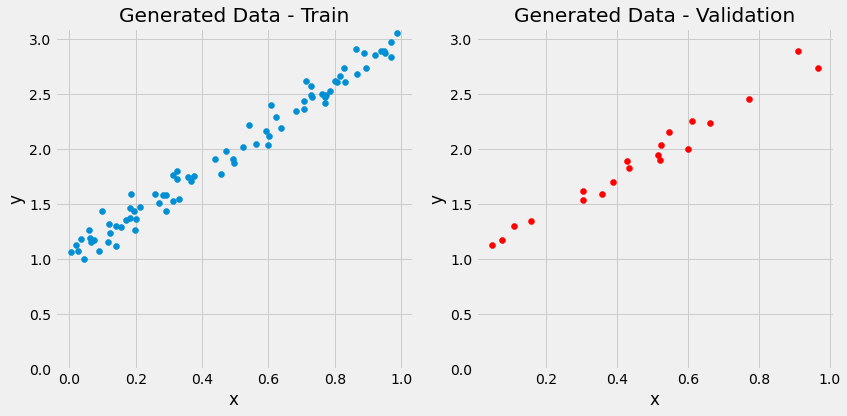

In [6]:
# let's plot the training and validation set
figure1(x_train, y_train, x_val, y_val)

We know that b = 1, w = 2, but now let’s see how close we can get to the true
values by using gradient descent and the 80 points in the training set (for training,
N = 80).

##Step 0: Random Initialization